<a href="https://colab.research.google.com/github/Sterling-M/COP4020-Python-Assignment/blob/main/CAP4770.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment #1
# read a csv file and get its **data**

Missing values in each column:
rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64
First few rows of the dataset:
   rowid species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      1  Adelie  Torgersen           39.10           18.7              181.0   
1      2  Adelie  Torgersen           39.50           17.4              186.0   
2      3  Adelie  Torgersen           40.30           18.0              195.0   
3      4  Adelie  Torgersen           44.45           17.3              197.0   
4      5  Adelie  Torgersen           36.70           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3       4050.0     NaN  2007  
4       3450.0  female  2007  

Summary of the dataset:
Number of r

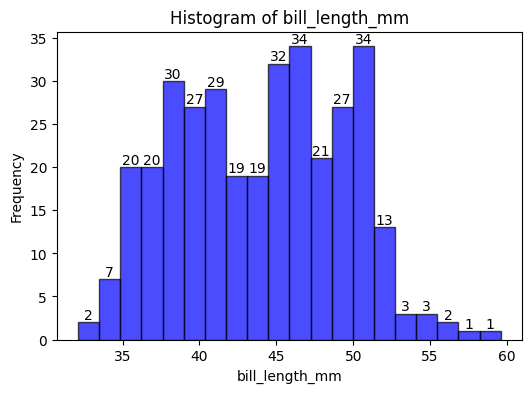

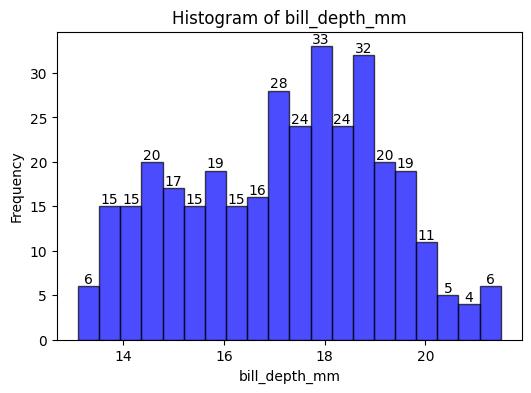

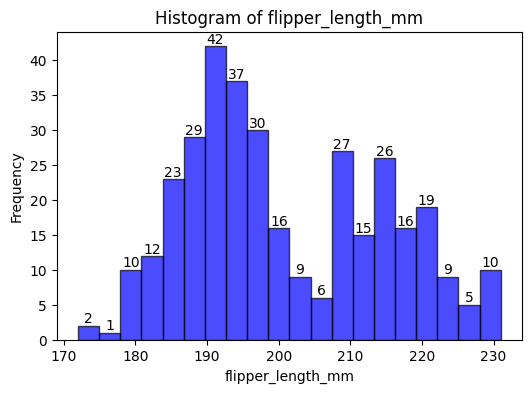

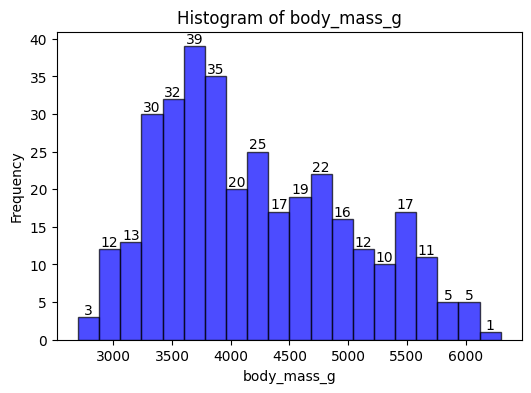

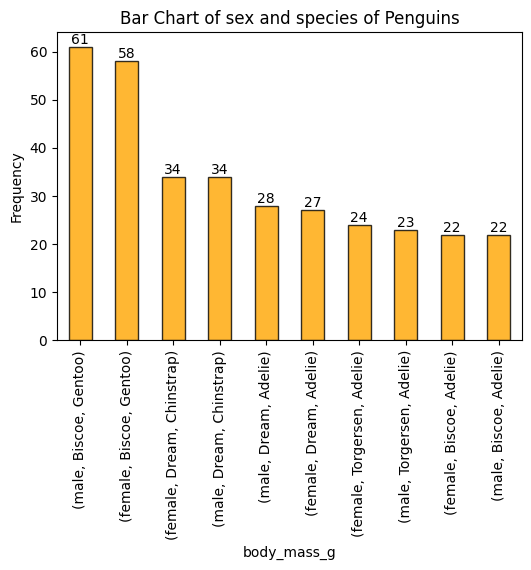

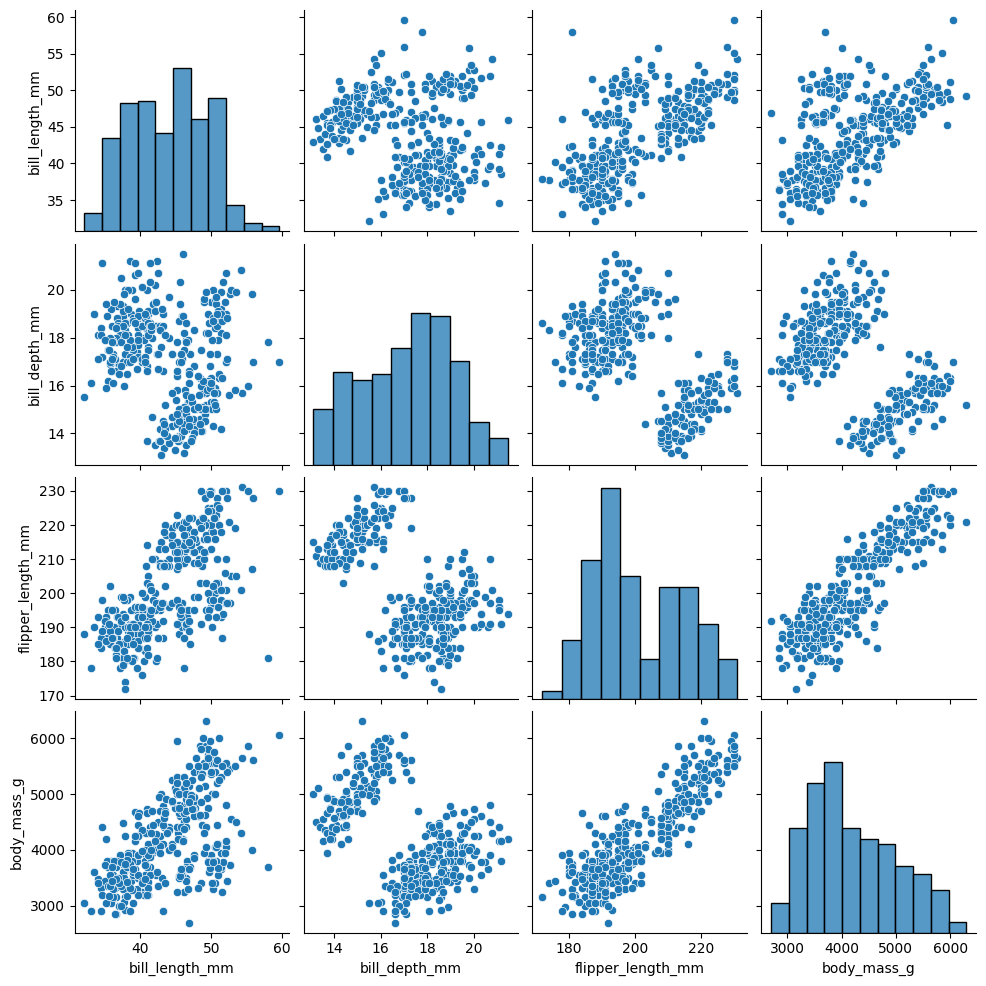

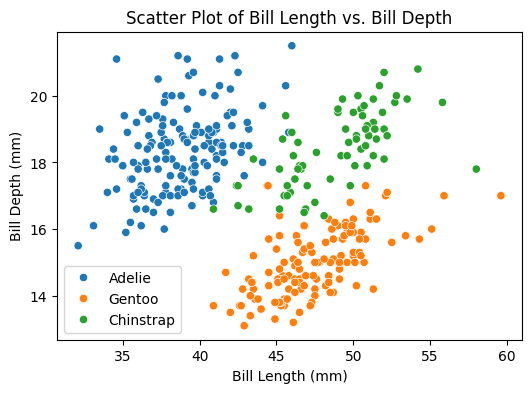

Cosine of the Angle (Correlation): -0.23500006348345276

Covariance Matrix for Categorical Attributes:
          species    island       sex
species  0.798020 -0.412367  0.005187
island  -0.412367  0.527358 -0.020578
sex      0.005187 -0.020578  0.312962


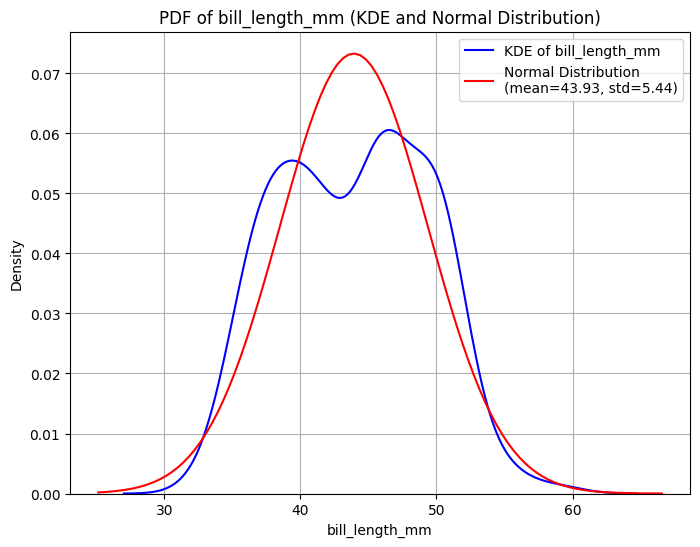

Largest variance attribute: body_mass_g with variance 639514.54
Smallest variance attribute: bill_depth_mm with variance 3.88

Largest covariance is between ('body_mass_g', 'body_mass_g') with value 639514.54
Smallest covariance is between ('bill_depth_mm', 'body_mass_g') with value -743.14


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

#reminder put penguins.csv in proper location

# Load the CSV file
file_path = '/content/sample_data/penguins.csv'
data = pd.read_csv(file_path)

# Checks for missing values
print("Missing values in each column:")
print(data.isnull().sum())
#Handle empty fields, went with using the median
numeric_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for column in numeric_columns:
    data[column] = data[column].fillna(data[column].median())

print("First few rows of the dataset:")
print(data.head())

# Display summary information
print("\nSummary of the dataset:")
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")
print("\nData types:")
print(data.dtypes)

"""
#Check if handling worked
data_cleaned = data.dropna()
print("\nAfter handling missing values:")
print(data_cleaned.isnull().sum())
"""
numeric_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
numerical_data = data[numeric_columns].dropna()
mean_vector = numerical_data.mean().values
print("\nMultivariate Mean Vector:")
print(mean_vector)

centered_data = numerical_data - numerical_data.mean()

# Compute the covariance matrix using the inner product
n_samples = centered_data.shape[0]
cov_matrix_inner = (centered_data.T @ centered_data) / (n_samples - 1)

print("\nSample Covariance Matrix (Inner Product):")
print(cov_matrix_inner)

# Initialize the covariance matrix with zeros
cov_matrix_outer = np.zeros((len(numeric_columns), len(numeric_columns)))

# Compute the covariance matrix using the outer product
for i in range(n_samples):
    outer_product = np.outer(centered_data.iloc[i], centered_data.iloc[i])
    cov_matrix_outer += outer_product

cov_matrix_outer /= (n_samples - 1)

print("\nSample Covariance Matrix (Outer Product):")
print(cov_matrix_outer)

print("\nDifference between Inner and Outer Product Covariance Matrices:")
print(cov_matrix_inner - cov_matrix_outer)


#Visualization
#Histograms for numerics
numeric_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    plt.hist(data[column].dropna(), bins=20, color='blue', alpha=0.7,edgecolor ='black')
    plt.title(f'Histogram of {column}')
    plt.bar_label(plt.gca().containers[0])
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

categorical_column = ['sex','island','species']
plt.figure(figsize=(6, 4))
data[categorical_column].value_counts().plot(kind='bar', color='orange', alpha=0.8,edgecolor ='black')
plt.title(f'Bar Chart of sex and species of Penguins')
plt.bar_label(plt.gca().containers[0])
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()


sns.pairplot(data[numeric_columns])
plt.show()
plt.figure(figsize=(6, 4))
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=data)
plt.title('Scatter Plot of Bill Length vs. Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.legend()
plt.show()


# Center the vectors (subtract the mean)
x = centered_data['bill_length_mm']
y = centered_data['bill_depth_mm']

# Compute cosine of the angle (correlation)
dot_product = np.dot(x, y)
norm_x = np.linalg.norm(x)
norm_y = np.linalg.norm(y)
cosine_similarity = dot_product / (norm_x * norm_y)

print(f"Cosine of the Angle (Correlation): {cosine_similarity}")


# Select categorical attributes
categorical_columns = ['species', 'island', 'sex']
categorical_data = data[categorical_columns]

# Encode categorical attributes manually
encoded_data = categorical_data.copy()
for column in categorical_columns:
    encoded_data[column] = pd.Categorical(encoded_data[column]).codes

# Compute the covariance matrix
cov_matrix_categorical = encoded_data.cov()
print("\nCovariance Matrix for Categorical Attributes:")
print(cov_matrix_categorical)

attribute = 'bill_length_mm'
data_attribute = data[attribute].dropna()

# Calculate the mean and standard deviation
mean = data_attribute.mean()
std_dev = data_attribute.std()

# Plot the Kernel Density Estimate (KDE)
plt.figure(figsize=(8, 6))
sns.kdeplot(data_attribute, color='blue', label=f'KDE of {attribute}')

# Plot the theoretical normal distribution with mean and std dev
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'r', label=f'Normal Distribution\n(mean={mean:.2f}, std={std_dev:.2f})')

plt.title(f'PDF of {attribute} (KDE and Normal Distribution)')
plt.xlabel(attribute)
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Step 1: Identify numerical attribute with largest and smallest variance
variance = data[numeric_columns].var()

# Largest and smallest variance
largest_variance_attribute = variance.idxmax()
smallest_variance_attribute = variance.idxmin()

print(f"Largest variance attribute: {largest_variance_attribute} with variance {variance.max():.2f}")
print(f"Smallest variance attribute: {smallest_variance_attribute} with variance {variance.min():.2f}")

# Step 2: Covariance Analysis (Largest and Smallest Covariance between attributes)
cov_matrix = data[numeric_columns].cov()

# Find largest and smallest covariance
largest_covariance_pair = cov_matrix.unstack().idxmax()
smallest_covariance_pair = cov_matrix.unstack().idxmin()

largest_covariance_value = cov_matrix.loc[largest_covariance_pair]
smallest_covariance_value = cov_matrix.loc[smallest_covariance_pair]

print(f"\nLargest covariance is between {largest_covariance_pair} with value {largest_covariance_value:.2f}")
print(f"Smallest covariance is between {smallest_covariance_pair} with value {smallest_covariance_value:.2f}")


# Assignment 2

(574, 1882)
(459, 1881)
(459, 10)
(115, 10)
(459, 10)
(115, 10)
47.82608695652174


<ipython-input-2-2747687a46d1>:160: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


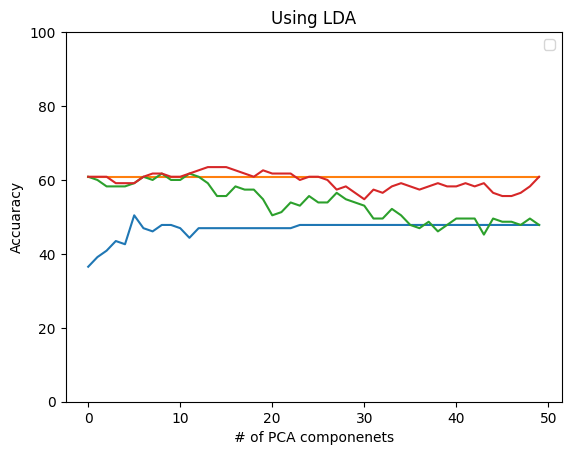

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier#(n_neighbors=5
from sklearn.decomposition import PCA,KernelPCA #(n_components=None
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


#load data
file_path = '/content/sample_data/Thyloid.csv'
df = pd.read_csv(file_path)
print(df.shape)

df.head()

#split data and labels
data=df.iloc[:,:-1].to_numpy()
label=df.iloc[:,-1].to_numpy()

#split your data
X_train,X_test,y_train,y_test=train_test_split(data,label,test_size=0.2)
print(X_train.shape)

def my_pca(Data,k):
    mean1=np.mean(Data)
    D_centered=Data - mean1
    cov_matrix=np.cov(D_centered,rowvar=False)
    eig_values,eig_vectors=np.linalg.eig(cov_matrix)
    idx=np.argsort(eig_values)[:-1]
    eig_values= eig_values[idx]
    eig_vectors= eig_vectors[:,idx]
    red_eig_vectors= eig_vectors[:,:k]
    projected_data=np.dot(D_centered,red_eig_vectors)
    return projected_data, mean1,red_eig_vectors

#apply PCA on Training Data
X_train_reduced,mean1,red_eig_vectors=my_pca(X_train,10)
print(X_train_reduced.shape)

#apply PCA to Testinmg Data
Test_centered=X_test-mean1
X_test_reduced=np.dot(Test_centered,red_eig_vectors)
print(X_test_reduced.shape)

#PCA on Training nad Testing using Sklearn
pca=PCA(n_components=10)
pca.fit(X_train)
X_train_reduced_sklearn=pca.transform(X_train) # reduce demensions of x_train using PCA_sklearn
X_test_reduced_sklearn=pca.transform(X_test)
print(X_train_reduced_sklearn.shape)
print(X_test_reduced_sklearn.shape)

#function to calculate distance between two points
def dis(x1, x2):
    return np.linalg.norm(x1-x2)
#function to perform classification
def my_mdc(Train, Trainlabel, Test):
    #Train is training data
    #Trainable is the trainable data
    #Test is Testing data
    pred=[]

    for testpoint in Test:
        pred_dis = []
        for trainpoint in Train:
            pred_dis.append(dis(testpoint, trainpoint))
        pred.append(Trainlabel[np.argmin(pred_dis)])

    return np.array(pred)

y_mdc=my_mdc(X_train_reduced_sklearn, y_train,X_test_reduced_sklearn)
print(100*accuracy_score(y_test,y_mdc))


accu=[]
for i in range(50):
    pca=PCA(n_components=i+1)
    pca.fit(X_train)
    X_train_reduced_sklearn=pca.transform(X_train) # reduce demensions of x_train using PCA_sklearn
    X_test_reduced_sklearn=pca.transform(X_test)
    y_mdc=my_mdc(X_train_reduced_sklearn, y_train,X_test_reduced_sklearn)
    Accuracy=100*accuracy_score(y_test,y_mdc)
    accu.append(Accuracy)

plt.plot(accu)
plt.title('Using Minimum Distance')
plt.ylim((0,100))
plt.xlabel('# of PCA componenets')
plt.ylabel('Accuaracy')
plt.grid()



# PCA+SVM Classifier
accu=[]
for i in range(50):
    pca=PCA(n_components=i+1)
    pca.fit(X_train)
    X_train_reduced_sklearn=pca.transform(X_train) # reduce demensions of x_train using PCA_sklearn
    X_test_reduced_sklearn=pca.transform(X_test)
    #Train NB classifer
    svm=SVC()
    svm.fit(X_train_reduced_sklearn,y_train)
    y_pred_svm=svm.predict(X_test_reduced_sklearn)
    Accuracy=100*accuracy_score(y_test,y_pred_svm)
    accu.append(Accuracy)

plt.plot(accu)
plt.title('Using SVM')
plt.ylim((0,100))
plt.xlabel('# of PCA componenets')
plt.ylabel('Accuaracy')
plt.grid()

# PCA+Naive Bayes Classifier
accu=[]
for i in range(50):
    pca=PCA(n_components=i+1)
    pca.fit(X_train)
    X_train_reduced_sklearn=pca.transform(X_train) # reduce demensions of x_train using PCA_sklearn
    X_test_reduced_sklearn=pca.transform(X_test)
    #Train NB classifer
    NB=GaussianNB()
    NB.fit(X_train_reduced_sklearn,y_train)
    y_pred_NB=NB.predict(X_test_reduced_sklearn)
    Accuracy=100*accuracy_score(y_test,y_pred_NB)
    accu.append(Accuracy)

plt.plot(accu)
plt.title('Using Naive Bayes')
plt.ylim((0,100))
plt.xlabel('# of PCA componenets')
plt.ylabel('Accuaracy')
plt.grid()

# PCA+LDA
accu=[]
for i in range(50):
    pca=PCA(n_components=i+1)
    pca.fit(X_train)
    X_train_reduced_sklearn=pca.transform(X_train) # reduce demensions of x_train using PCA_sklearn
    X_test_reduced_sklearn=pca.transform(X_test)
    #Train LDA classifer
    LDA=LinearDiscriminantAnalysis()
    LDA.fit(X_train_reduced_sklearn,y_train)
    y_pred_LDA=LDA.predict(X_test_reduced_sklearn)
    Accuracy=100*accuracy_score(y_test,y_pred_LDA)
    accu.append(Accuracy)

plt.plot(accu)
plt.title('Using LDA')
plt.ylim((0,100))
plt.xlabel('# of PCA componenets')
plt.ylabel('Accuaracy')
plt.grid()